# The Unary Code

Unary coding is one of the simplest variable-length, prefix-free codes for positive integers. We denote the unary codeword of a positive integer $n$ by $u(n)$.

For a positive integer $n$, the unary code $u(n)$ is constructed as:

- Output $n-1$ zeros followed by a single one.

Examples:

- $u(0) = 1$
- $u(2) = 001$
- $u(7) = 00000001$

Note that the unary code is not a universal code, because its codeword lengths grow linearly with $n$ rather than sublinearly.

In this notebook, we'll implement encoding, decoding, and length functions for the unary code.

# Imports

In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

# Function Definitions

In this section, we define the core functions for unary coding:

- `unary_encode`
- `unary_decode`
- `unary_length`
- `unary_implied_probability`

These functions form the foundation for encoding, decoding, and analyzing unary codes throughout this demo.

## `unary_encode`

Encode a positive integer or a sequence of positive integers using unary coding.

In [2]:
def unary_encode(numbers, collapse=True):
    if isinstance(numbers, int):
        number = numbers
        if number <= 0:
            raise ValueError("Number must be positive")
        return "0" * (number-1) + "1"
    
    try:
        codewords = [unary_encode(number) for number in numbers]
        if collapse: codewords = "".join(codewords)
        return codewords
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `unary_decode`

Decode a unary codeword or a sequence of codewords into their corresponding positive integers.

In [3]:
def unary_decode(codewords, as_list=False):
    def single_decode(codeword):
        zeroes = 0
        for bit in codeword:
            if bit == "0":
                zeroes += 1
            elif bit == "1":
                return zeroes+1
            else:
                raise ValueError("Invalid character in codeword")
        raise ValueError("No terminating 1 found in codeword")
    
    codeword_list = re.findall(r'[^1]*1', codewords)
    if not codeword_list:
        # no valid codewords found
        # pass the entire string to single_decode and let it handle it
        codeword_list = [codewords]
    
    symbols = [single_decode(codeword) for codeword in codeword_list]

    if not as_list and len(symbols) == 1:
        return symbols[0]
    return symbols

## `unary_length`

Return the length of the unary codeword for a positive integer.

In [4]:
def unary_length(numbers, as_list=False):
    if isinstance(numbers, int):
        if numbers <= 0:
            raise ValueError("Number must be positive")
        length = numbers
        return [length] if as_list else length
    
    try:
        lengths = [unary_length(number) for number in numbers]
        return lengths
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `unary_implied_probability`

Compute the implied probability of unary codewords.

In [5]:
def unary_implied_probability(numbers, as_list=False):
    def prob(number):
        if number <= 0:
            raise ValueError("Number must be positive")
        return np.exp2(-unary_length(number))
    
    if isinstance(numbers, int):
        return [prob(numbers)] if as_list else prob(numbers)
    
    try:
        probabilities = [prob(number) for number in numbers]
        return probabilities
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

# Encoding / Decoding Example

In this section, we demonstrate how to **encode numbers into unary codewords** and then **decode them back to integers**. We also compute the **lengths of each codeword**.  

- The `numbers` list includes both **individual integers** and **small sequences of integers** to show that our functions can handle **single values as well as iterables**.  
- `unary_encode` converts each number or sequence into its unary representation.  
- `unary_decode` verifies that decoding returns the original numbers.  
- `unary_length` calculates the length of each codeword, giving insight into how the unary code grows with the value of `n`.  

We then organize all results into a **pandas DataFrame** for easy inspection and comparison.

In [6]:
numbers = [1, 2, 3, 5, 8, [3,2], [2,3,5]]
encoded = [unary_encode(number) for number in numbers]
decoded = [unary_decode(code) for code in encoded]
lengths = [unary_length(number) for number in numbers]
probs = [unary_implied_probability(number) for number in numbers]

results_df = pd.DataFrame(
    list(zip(encoded, decoded, lengths, probs)),
    index=pd.Index(numbers, name="Message"),
    columns=[
        "Unary Codeword", "Decoded", "Codeword Length(s)", "Probability (Implied)"
    ]
)

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(results_df)

,Unary Codeword,Decoded,Codeword Length(s),Probability (Implied)
Message,,,,
1,1,1,1,0.5
2,01,2,2,0.25
3,001,3,3,0.125
5,00001,5,5,0.03125
8,00000001,8,8,0.003906
"[3, 2]",00101,"[3, 2]","[3, 2]","[0.125, 0.25]"
"[2, 3, 5]",0100100001,"[2, 3, 5]","[2, 3, 5]","[0.25, 0.125, 0.03125]"


## Visualizing Unary Codes

Let's visualize how the code length grows with the number.

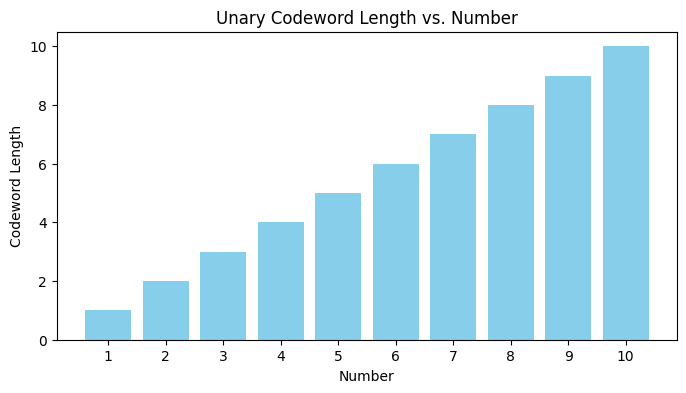

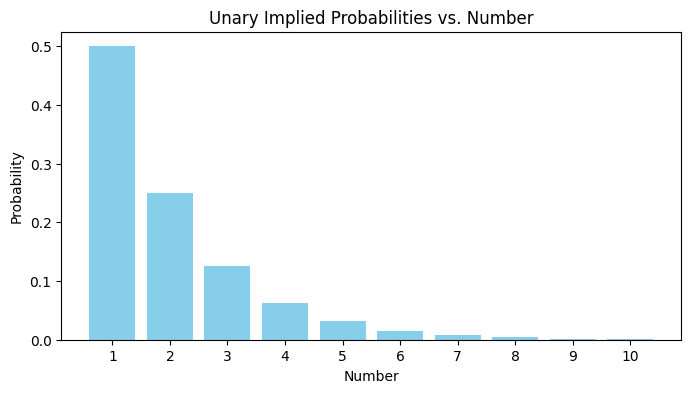

In [7]:
numbers = list(range(1, 11))
code_lengths = [unary_length(number) for number in numbers]
probs = [unary_implied_probability(number) for number in numbers]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, code_lengths, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Codeword Length")
ax.set_title("Unary Codeword Length vs. Number")
ax.set_xticks(numbers)
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, probs, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Probability")
ax.set_title("Unary Implied Probabilities vs. Number")
ax.set_xticks(numbers)
plt.show()

### Notes:
- Unary codes are extremely simple but **inefficient** for large numbers.
- They are prefix codes and therefore uniquely decodable.
- They are useful in some theoretical constructions and as building blocks for Elias codes.